## Feature extraction (librosa)

In [1]:
import numpy as np
import pandas as pd
import librosa
import os

In [4]:
os.chdir('/Users/hyunwoogu/Documents/AniEmotionSounds')
PARSE = pd.read_csv('parse.csv')

In [26]:
os.chdir('/Users/hyunwoogu/Documents/AniEmotionSounds/Numbers/')
samples  = [i for i in os.listdir() if 'wav' in i]
samples  = np.sort(np.array(samples))

In [27]:
features = np.zeros([len(samples), 3*4])

def MinMaxMean(array):
    Min = np.min(array)
    Max = np.max(array)
    Mean= np.mean(array)
    return(Min, Max, Mean)

In [28]:
for i in range(len(samples)):
    data, fs = librosa.load(samples[i])
    pitches = librosa.core.piptrack(y=data, sr=fs, fmin=75, fmax=1600)[0]
    pitches = pitches[pitches>0]
    rmse    = librosa.feature.rmse(data)
    rmse    = rmse[rmse>0]
    features[i, 0:3] = MinMaxMean(pitches)
    features[i, 3:6] = MinMaxMean(rmse)
    features[i, 6:9] = MinMaxMean(librosa.feature.mfcc(data))
    features[i, 9:12]= MinMaxMean(librosa.feature.delta(data))

In [41]:
colnames = []

for i in ['Pitch', 'RMSE', 'MFCC', 'Delta']:
    for j in ['Min', 'Max', 'Mean']:
        colnames.append(i + j)

FEAT = pd.DataFrame(features)
FEAT.columns = colnames
DATA = pd.concat([PARSE, FEAT], axis=1)
#DATA[:, 5:16] = pd.DataFrame(features)
#DATA.loc[:,12] = [k.split('.')[0] for k in samples]
#DATA.loc[:,13] = labels[:,0]
#DATA = DATA.loc[:, [12, 13] + [i for i in range(12)]]

#DATA.columns = PARSE.columns.tolist + colnames
DATA.to_csv('records.csv', index=False)

## Visualization (ggplot2)

In [2]:
library(tidyverse)
library(gridExtra)
library(ggbiplot)

In [3]:
setwd('/Users/hyunwoogu/Documents/AniEmotionSounds/Numbers/')
DATA = read.csv('records.csv')

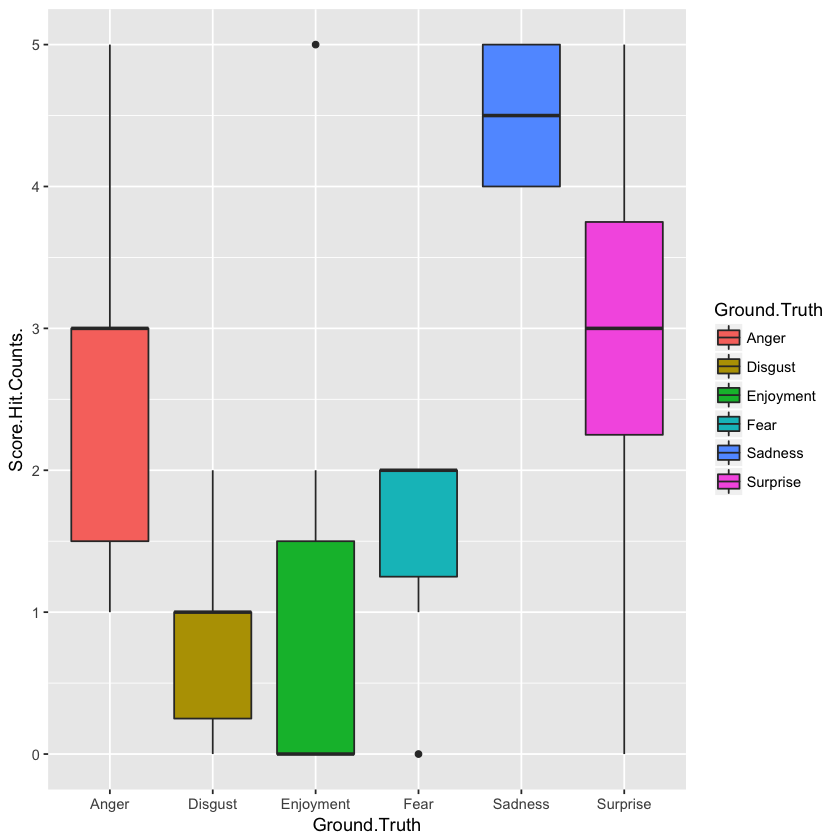

In [15]:
ggplot(DATA, aes(x=Ground.Truth, y=Score.Hit.Counts., fill=Ground.Truth)) + geom_boxplot()

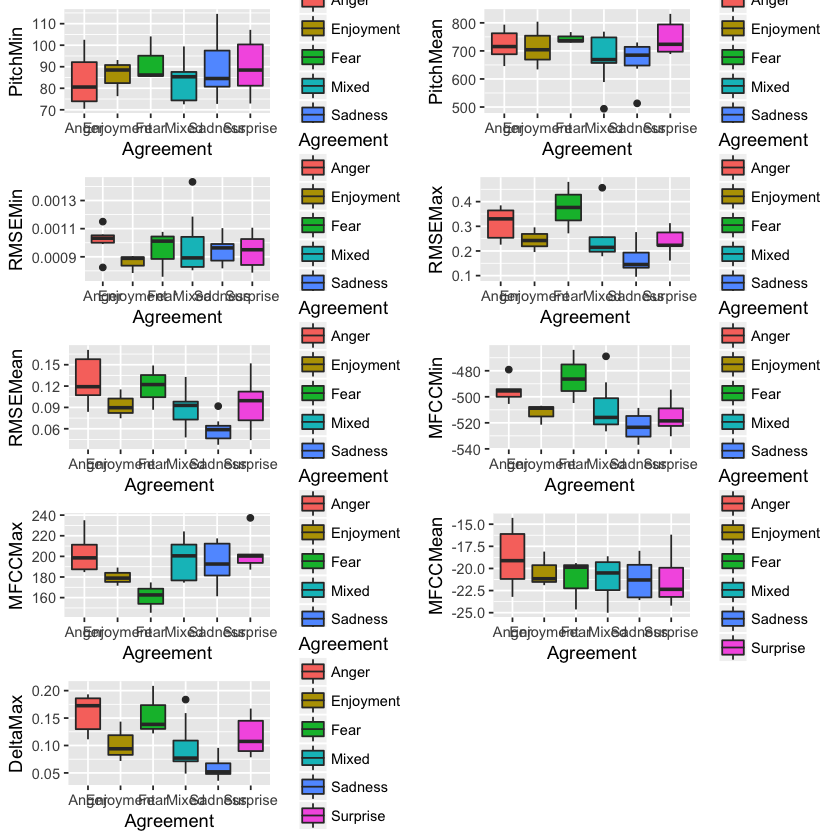

In [16]:
p1 = ggplot(DATA, aes(x=Agreement, y=PitchMin, fill=Agreement)) + geom_boxplot()
#p2 = ggplot(DATA, aes(x=Ground.Truth, y=PitchMax, fill=Ground.Truth)) + geom_boxplot()
p3 = ggplot(DATA, aes(x=Agreement, y=PitchMean, fill=Agreement)) + geom_boxplot()
p4 = ggplot(DATA, aes(x=Agreement, y=RMSEMin, fill=Agreement)) + geom_boxplot()
p5 = ggplot(DATA, aes(x=Agreement, y=RMSEMax, fill=Agreement)) + geom_boxplot()
p6 = ggplot(DATA, aes(x=Agreement, y=RMSEMean, fill=Agreement)) + geom_boxplot()
p7 = ggplot(DATA, aes(x=Agreement, y=MFCCMin, fill=Agreement)) + geom_boxplot()
p8 = ggplot(DATA, aes(x=Agreement, y=MFCCMax, fill=Agreement)) + geom_boxplot()
p9 = ggplot(DATA, aes(x=Agreement, y=MFCCMean, fill=Agreement)) + geom_boxplot()
p10 = ggplot(DATA, aes(x=Agreement, y=DeltaMax, fill=Agreement)) + geom_boxplot()

grid.arrange(p1, p3, p4, p5, p6, p7, p8, p9, p10, ncol = 2, nrow =5 )

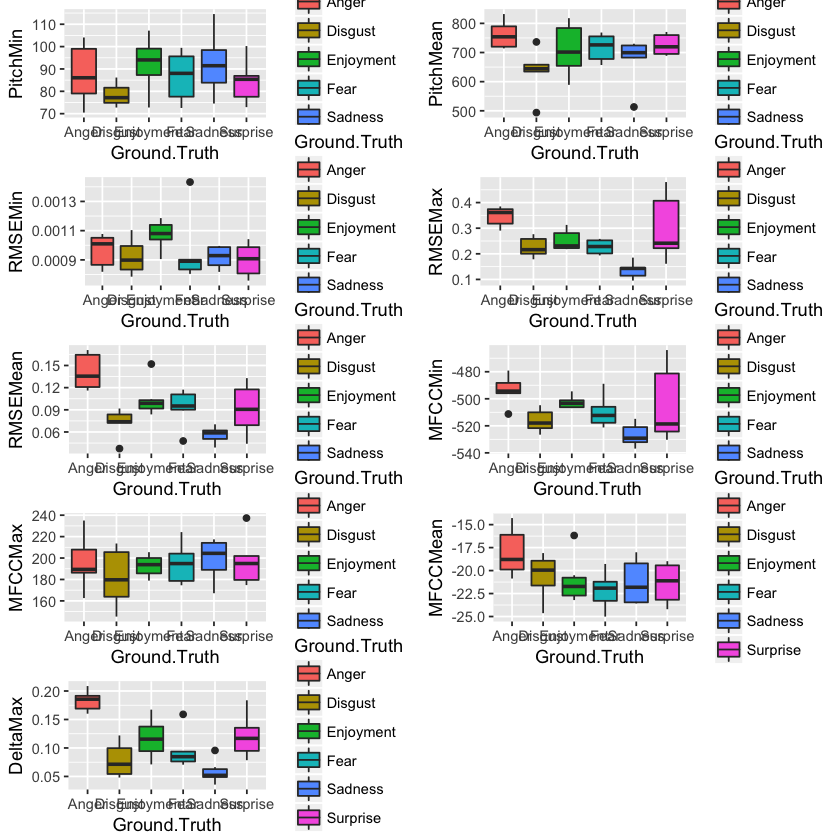

In [10]:
p1 = ggplot(DATA, aes(x=Ground.Truth, y=PitchMin, fill=Ground.Truth)) + geom_boxplot()
#p2 = ggplot(DATA, aes(x=Ground.Truth, y=PitchMax, fill=Ground.Truth)) + geom_boxplot()
p3 = ggplot(DATA, aes(x=Ground.Truth, y=PitchMean, fill=Ground.Truth)) + geom_boxplot()
p4 = ggplot(DATA, aes(x=Ground.Truth, y=RMSEMin, fill=Ground.Truth)) + geom_boxplot()
p5 = ggplot(DATA, aes(x=Ground.Truth, y=RMSEMax, fill=Ground.Truth)) + geom_boxplot()
p6 = ggplot(DATA, aes(x=Ground.Truth, y=RMSEMean, fill=Ground.Truth)) + geom_boxplot()
p7 = ggplot(DATA, aes(x=Ground.Truth, y=MFCCMin, fill=Ground.Truth)) + geom_boxplot()
p8 = ggplot(DATA, aes(x=Ground.Truth, y=MFCCMax, fill=Ground.Truth)) + geom_boxplot()
p9 = ggplot(DATA, aes(x=Ground.Truth, y=MFCCMean, fill=Ground.Truth)) + geom_boxplot()
p10 = ggplot(DATA, aes(x=Ground.Truth, y=DeltaMax, fill=Ground.Truth)) + geom_boxplot()

grid.arrange(p1, p3, p4, p5, p6, p7, p8, p9, p10, ncol = 2, nrow =5 )

## Principal Component Analysis (prcomp)

In [17]:
DATAnumeric = DATA[,c(6:8, 9:14)]

In [67]:
DATAnumeric

PitchMin,PitchMax,PitchMean,RMSEMin,RMSEMax,RMSEMean,MFCCMin,MFCCMax,MFCCMean
77.47886,1593.128,778.1396,0.0008244895,0.30545944,0.12219324,-494.7043,191.6416,-15.41146
88.45673,1598.226,831.9520,0.0008184598,0.29057065,0.12039416,-511.2616,187.1431,-20.86542
107.13824,1596.828,817.8359,0.0010534461,0.31283310,0.15193579,-494.4999,200.3234,-16.18142
87.58302,1597.226,669.0136,0.0009039535,0.19365065,0.09282588,-518.3765,200.5125,-25.00728
97.02834,1593.605,730.1243,0.0009806455,0.18513072,0.05574341,-514.8378,215.0734,-20.44987
72.55080,1597.864,757.7627,0.0008042844,0.25824890,0.09756825,-521.2151,224.2078,-19.27930
85.40366,1597.694,737.9859,0.0010416569,0.45628628,0.13286410,-468.9054,176.6877,-19.28936
82.81569,1596.462,636.7176,0.0011036546,0.27651960,0.09178269,-508.5310,161.3104,-19.85073
74.52365,1594.687,709.4191,0.0008589579,0.10588750,0.04889446,-529.8672,211.4222,-23.54837
70.48375,1596.004,793.6393,0.0010288497,0.36751971,0.11609714,-493.9495,235.0304,-18.18687


In [68]:
DATApca

Standard deviations (1, .., p=9):
[1] 1.8333505 1.3423985 1.0683564 0.9971060 0.7861624 0.7612163 0.5350883
[8] 0.3944497 0.2485450

Rotation (n x k) = (9 x 9):
                  PC1          PC2         PC3         PC4         PC5
PitchMin   0.19862285  0.472159822  0.14953730 -0.48225228  0.07548116
PitchMax   0.03699339 -0.401398021 -0.61342884  0.11400742  0.48883630
PitchMean  0.29099007 -0.220640057 -0.10954684 -0.70647759  0.13048326
RMSEMin    0.19864790  0.503035310  0.07768469  0.34296726  0.61205482
RMSEMax    0.49656387 -0.175203685 -0.08770479  0.05141205 -0.17845868
RMSEMean   0.50184118 -0.004753732  0.13524879  0.03881542  0.07248057
MFCCMin    0.49970693  0.005771476 -0.08445503  0.18233302 -0.02187701
MFCCMax   -0.15696883 -0.392522099  0.57362073 -0.14076252  0.54285831
MFCCMean   0.24955513 -0.359711462  0.47026638  0.28370523 -0.17728510
                 PC6         PC7         PC8         PC9
PitchMin  -0.5363151  0.27478963 -0.32766668  0.08049450
PitchMax  -0.43

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.8334 1.3424 1.0684 0.9971 0.78616 0.76122 0.53509
Proportion of Variance 0.3735 0.2002 0.1268 0.1105 0.06867 0.06438 0.03181
Cumulative Proportion  0.3735 0.5737 0.7005 0.8110 0.87965 0.94404 0.97585
                           PC8     PC9
Standard deviation     0.39445 0.24854
Proportion of Variance 0.01729 0.00686
Cumulative Proportion  0.99314 1.00000

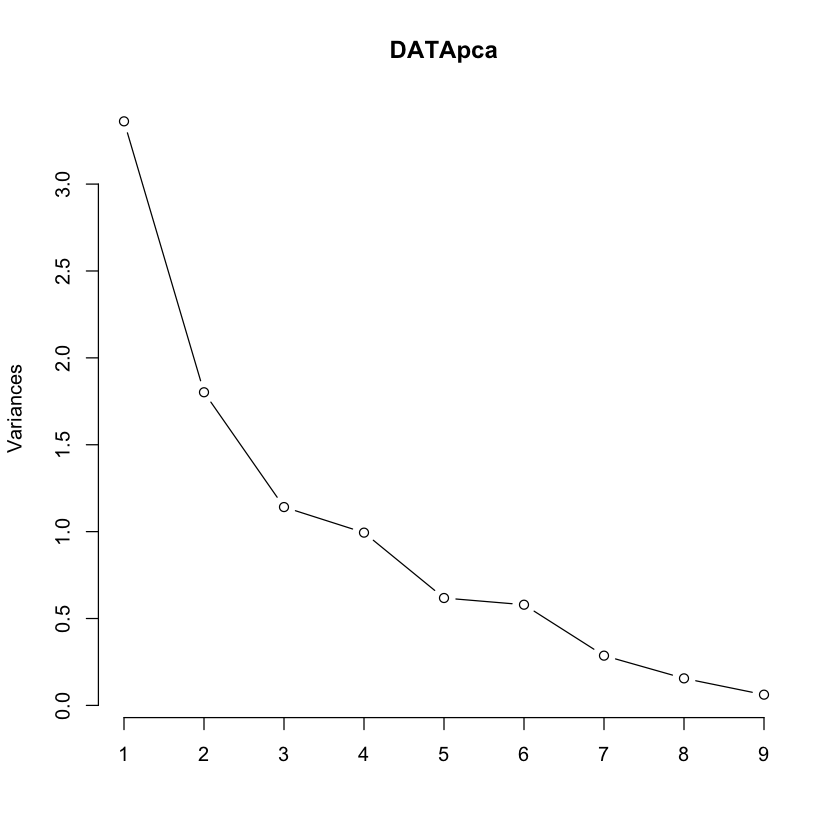

In [18]:
DATApca = prcomp(DATAnumeric, center=T, scale.=T)
plot(DATApca, type="l")
summary(DATApca)

In [49]:
DATA$CB = 1

for (i in 1:36)
{
    DATA[i, 'CB'] = ifelse(endsWith(unlist(DATA['File.Name'])[i], '_2'), 0, 1)
}

In [51]:
DATA$CB = as.factor(DATA$CB)

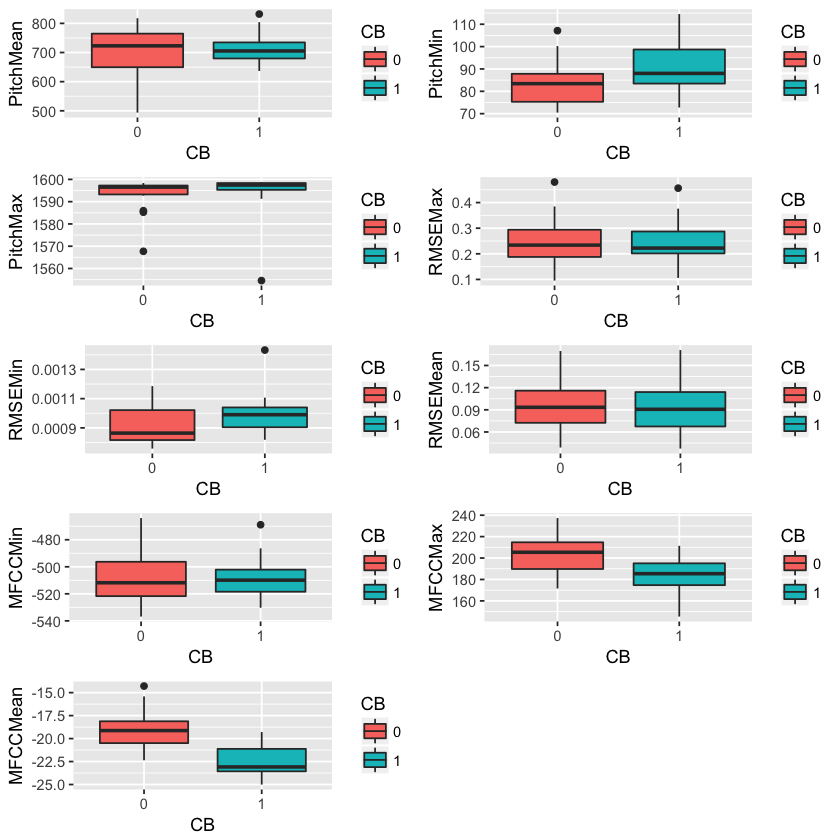

In [52]:
p1 = ggplot(DATA, aes(x=CB, y=PitchMean, fill=CB)) + geom_boxplot()
p2 = ggplot(DATA, aes(x=CB, y=PitchMin, fill=CB)) + geom_boxplot()
p3 = ggplot(DATA, aes(x=CB, y=PitchMax, fill=CB)) + geom_boxplot()
p4 = ggplot(DATA, aes(x=CB, y=RMSEMax, fill=CB)) + geom_boxplot()
p5 = ggplot(DATA, aes(x=CB, y=RMSEMin, fill=CB)) + geom_boxplot()
p6 = ggplot(DATA, aes(x=CB, y=RMSEMean, fill=CB)) + geom_boxplot()
p7 = ggplot(DATA, aes(x=CB, y=MFCCMin, fill=CB)) + geom_boxplot()
p8 = ggplot(DATA, aes(x=CB, y=MFCCMax, fill=CB)) + geom_boxplot()
p9 = ggplot(DATA, aes(x=CB, y=MFCCMean, fill=CB)) + geom_boxplot()


grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, ncol = 2, nrow =5 )

In [57]:
DATA$CBEmotion = paste0(DATA$Ground.Truth, DATA$CB)

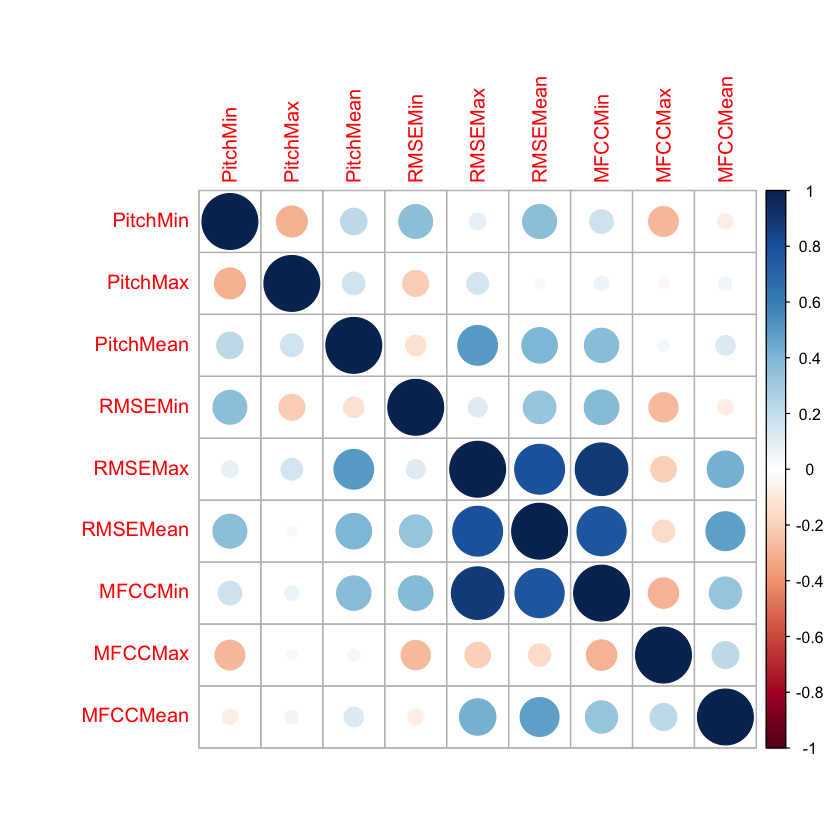

In [66]:
library(corrplot)

corrplot(cor(DATAnumeric))

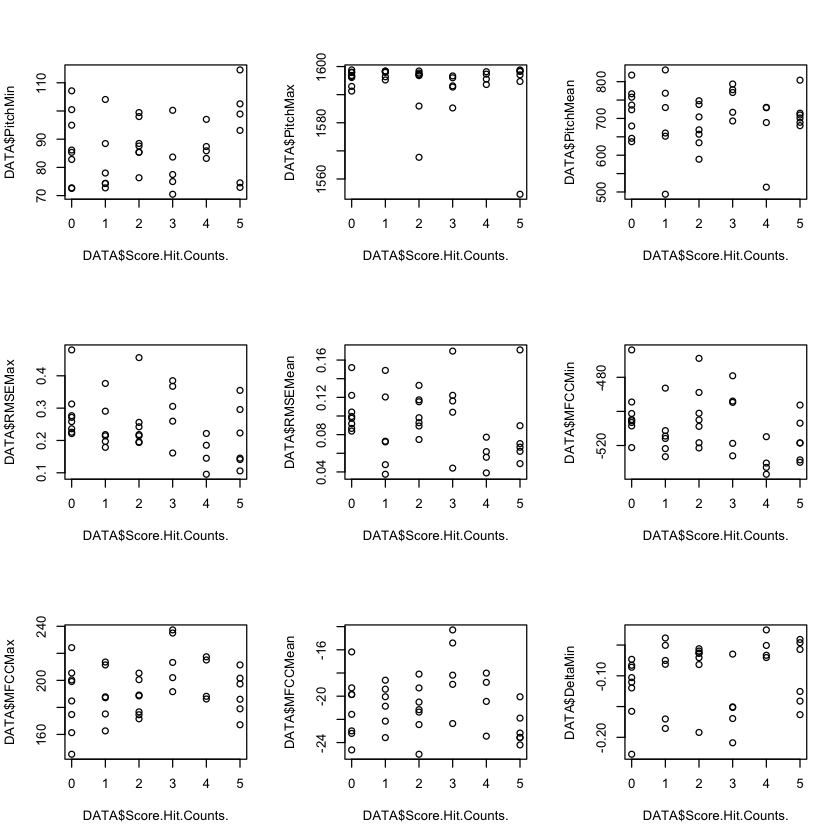

In [64]:
par(mfrow=c(3,3))

plot(DATA$'Score.Hit.Counts.', DATA$PitchMin)
plot(DATA$'Score.Hit.Counts.', DATA$PitchMax)
plot(DATA$'Score.Hit.Counts.', DATA$PitchMean)
plot(DATA$'Score.Hit.Counts.', DATA$RMSEMax)
plot(DATA$'Score.Hit.Counts.', DATA$RMSEMean)
plot(DATA$'Score.Hit.Counts.', DATA$MFCCMin)
plot(DATA$'Score.Hit.Counts.', DATA$MFCCMax)
plot(DATA$'Score.Hit.Counts.', DATA$MFCCMean)
plot(DATA$'Score.Hit.Counts.', DATA$DeltaMin)


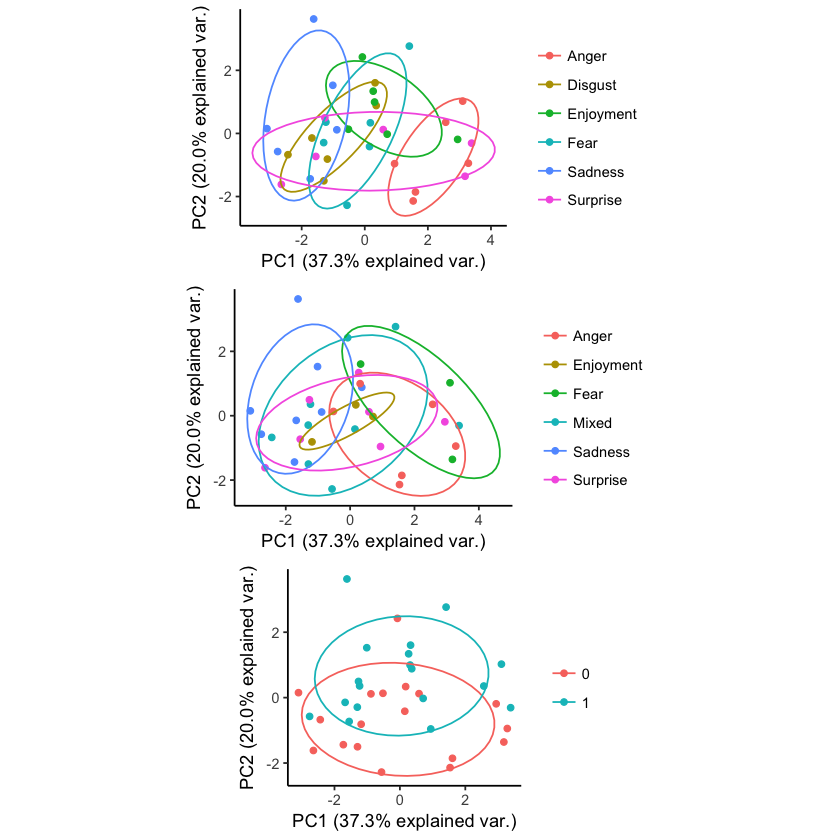

In [54]:
p1=ggbiplot(DATApca, obs.scale = 1, var.scale = 1, 
         groups = DATA$Ground.Truth, varname.size=0, var.axes = F, ellipse = TRUE) +  # circle = TRUE #  
    scale_color_discrete(name = '') +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    theme_classic()

p2=ggbiplot(DATApca, obs.scale = 1, var.scale = 1, 
         groups = DATA$Agreement, varname.size=0, var.axes = F, ellipse = TRUE) +  # circle = TRUE #  
    scale_color_discrete(name = '') +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    theme_classic()

p3=ggbiplot(DATApca, obs.scale = 1, var.scale = 1, 
         groups = DATA$CB, varname.size=0, var.axes = F, ellipse = TRUE) +  # circle = TRUE #  
    scale_color_discrete(name = '') +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    theme_classic()

grid.arrange(p1,p2,p3,nrow =3 )

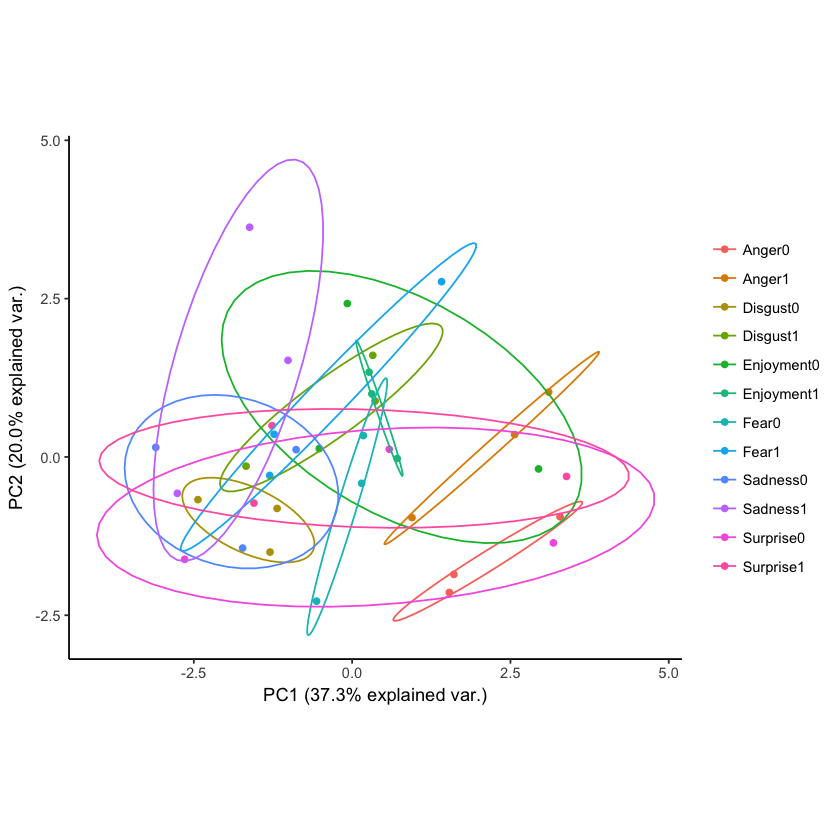

In [59]:
ggbiplot(DATApca, obs.scale = 1, var.scale = 1, 
         groups = DATA$CBEmotion, varname.size=0, var.axes = F, ellipse = TRUE) +  # circle = TRUE #  
    scale_color_discrete(name = '') +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    theme_classic()